In [17]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

In [18]:
pylab.ion()

In [19]:
N    = 100     #  Number of spatial points.
T    = 2      #  Number of time steps.  5*N is a nice value for terminating
                #  before anything reaches the boundaries.
Tp   = 50       #  Number of time steps to increment before updating the plot.

#X    = dx*np.linspace(0,N,N)        #  Spatial axis.
# Potential parameters.  By playing with the type of potential and the height
# and thickness (for barriers), you'll see the various transmission/reflection
# regimes of quantum mechanical tunneling.
V0   = 1.0e-2   #  Potential amplitude (used for steps and barriers)
THCK = 15       # "Thickness" of the potential barrier (if appropriate
                # V-function is chosen)
# Uncomment the potential type you want to use here:
# Zero potential, packet propagates freely.
#POTENTIAL = 'free'
# Potential step.  The height (V0) of the potential chosen above will determine
# the amount of reflection/transmission you'll observe
POTENTIAL = 'step'
# Potential barrier.  Note that BOTH the potential height (V0) and thickness
# of the barrier (THCK) affect the amount of tunneling vs reflection you'll
# observe.
#POTENTIAL = 'barrier'
#  Initial wave function constants
sigma = 40.0 # Standard deviation on the Gaussian envelope (remember Heisenberg
             #  uncertainty).
x0 = round(N/2) - 5*sigma # Time shift
k0 = np.pi/20 # Wavenumber (note that energy is a function of k)
# Energy for a localized gaussian wavepacket interacting with a localized
# potential (so the interaction term can be neglected by computing the energy
# integral over a region where V=0)
#E = (hbar**2/2.0/m)*(k0**2+0.5/sigma**2)

In [20]:
longitud=40e-9
dx=longitud/N
#dx   = 0.05e-9    #  Spatial resolution
m    = 9.1e-31    #  Particle mass
hbar = 1.054e-34    #  Plank's constant
dt   = 0.25*(m/hbar)*dx**2# hbar/(2*hbar**2/(m*dx**2)+Vmax)        

c1=1.0/8.0
c2=dt/hbar
lmbda=5*dx

In [21]:
print 'One-dimensional Schrodinger equation - time evolution'
print 'Wavepacket energy:   ',E
print 'Potential type:      ',POTENTIAL
print 'Potential height V0: ',V0
print 'Barrier thickness:   ',THCK

One-dimensional Schrodinger equation - time evolution
Wavepacket energy:   

NameError: name 'E' is not defined

In [22]:
psi_r = np.zeros((N,N)) #  Real
psi_i = np.zeros((N,N)) #  Imaginary
psi_p = np.zeros((N,N))   # Observable probability (magnitude-squared



In [23]:
for i in range(1,N-1):
    for j in range(1,N-1):
        psi_r[i][j]=np.exp((-1.*(i-N/2)/sigma)**2)*np.cos(2*np.pi*(i-N/2)/lmbda)*np.sin(np.pi*(j)/N)
        psi_i[i][j]=np.exp((-1.*(i-N/2)/sigma)**2)*np.sin(2*np.pi*(i-N/2)/lmbda)*np.sin(np.pi*(j)/N)

In [24]:
for t in range(T+1):
        for i in range(1,N-1):
            for j in range(1,N-1):
                psi_r[i][j]=psi_r[i][j]-c1*( psi_i[i+1][j]+psi_i[i-1][j]+psi_i[i][j+1]+psi_i[i][j-1]-4*psi_i[i][j] )
                psi_i[i][j]=psi_i[i][j]+c1*( psi_r[i+1][j]+psi_r[i-1][j]+psi_r[i][j+1]+psi_r[i][j-1]-4*psi_r[i][j] )

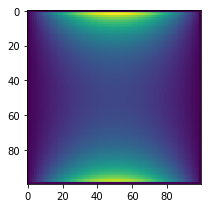

In [25]:
fig = plt.figure(figsize=(6, 3.2))
plt.imshow(psi_r)

In [26]:
psi_r

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.12878569,  0.26078192, ...,  0.4119027 ,
         0.24873491,  0.        ],
       [ 0.        ,  0.14352429,  0.28982643, ...,  0.44723355,
         0.28513558,  0.        ],
       ..., 
       [ 0.        ,  0.13083582,  0.26275055, ...,  0.40165561,
         0.25764796,  0.        ],
       [ 0.        ,  0.12120194,  0.2454174 , ...,  0.38859551,
         0.23749277,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])